# Data Cleaning is one of the essential step towards making real meaning of any dataset. It makes the data ready for modelling and analysis**.

Here you will be learning how to do data cleaning.

In [1]:
import pandas as pd
import numpy as np

import sys
import os
sys.path.append(os.path.abspath(os.path.join('../scripts')))
from clean_dataframe import Utility
from plot_dataframe import Plotter

# Read CSV Data

In [2]:
df = pd.read_excel('../data/Week1_challenge_data_source.xlsx')


In [3]:

#initialize the imported modules
plot = Plotter()
cleaner = Utility()

In [4]:
df.head()

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311448e+19,2019-04-04 12:01:18,770.0,2019-04-25 14:35:31,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9164566995485190,...,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,1.311448e+19,2019-04-09 13:04:04,235.0,2019-04-25 08:15:48,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,1.311448e+19,2019-04-09 17:42:11,1.0,2019-04-25 11:58:13,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,1.311448e+19,2019-04-10 00:31:25,486.0,2019-04-25 07:36:35,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,...,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,1.311448e+19,2019-04-12 20:10:23,565.0,2019-04-25 10:40:32,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0


Before Cleaning a dataset, you need to explore what has been stored in it. The column names, how many data points,
number of colum etc. All these questions needs to be answered

In [5]:
# column names
df.columns.tolist()

['Bearer Id',
 'Start',
 'Start ms',
 'End',
 'End ms',
 'Dur. (ms)',
 'IMSI',
 'MSISDN/Number',
 'IMEI',
 'Last Location Name',
 'Avg RTT DL (ms)',
 'Avg RTT UL (ms)',
 'Avg Bearer TP DL (kbps)',
 'Avg Bearer TP UL (kbps)',
 'TCP DL Retrans. Vol (Bytes)',
 'TCP UL Retrans. Vol (Bytes)',
 'DL TP < 50 Kbps (%)',
 '50 Kbps < DL TP < 250 Kbps (%)',
 '250 Kbps < DL TP < 1 Mbps (%)',
 'DL TP > 1 Mbps (%)',
 'UL TP < 10 Kbps (%)',
 '10 Kbps < UL TP < 50 Kbps (%)',
 '50 Kbps < UL TP < 300 Kbps (%)',
 'UL TP > 300 Kbps (%)',
 'HTTP DL (Bytes)',
 'HTTP UL (Bytes)',
 'Activity Duration DL (ms)',
 'Activity Duration UL (ms)',
 'Dur. (ms).1',
 'Handset Manufacturer',
 'Handset Type',
 'Nb of sec with 125000B < Vol DL',
 'Nb of sec with 1250B < Vol UL < 6250B',
 'Nb of sec with 31250B < Vol DL < 125000B',
 'Nb of sec with 37500B < Vol UL',
 'Nb of sec with 6250B < Vol DL < 31250B',
 'Nb of sec with 6250B < Vol UL < 37500B',
 'Nb of sec with Vol DL < 6250B',
 'Nb of sec with Vol UL < 1250B',
 'Socia

In [6]:
# Shape
df.shape

(150001, 55)

In [7]:
# number of data points
print(f" There are {df.shape[0]} rows and {df.shape[1]} columns")

 There are 150001 rows and 55 columns


In [8]:
# Total number of null
df.isnull().sum().sum()

1031392

In [9]:
# Show datas field description 
telldata_field_description_df = pd.read_excel("../data/Field Descriptions.xlsx")
telldata_field_description_df.shape

(56, 2)

In [10]:
# rename the columns to their appropriate name. because Dur (ms) only exist once  
df = df.rename(columns={'Dur. (ms)': 'Dur (s)' , 'Dur. (ms).1': 'Dur (ms)'})
df.columns.to_list()

['Bearer Id',
 'Start',
 'Start ms',
 'End',
 'End ms',
 'Dur (s)',
 'IMSI',
 'MSISDN/Number',
 'IMEI',
 'Last Location Name',
 'Avg RTT DL (ms)',
 'Avg RTT UL (ms)',
 'Avg Bearer TP DL (kbps)',
 'Avg Bearer TP UL (kbps)',
 'TCP DL Retrans. Vol (Bytes)',
 'TCP UL Retrans. Vol (Bytes)',
 'DL TP < 50 Kbps (%)',
 '50 Kbps < DL TP < 250 Kbps (%)',
 '250 Kbps < DL TP < 1 Mbps (%)',
 'DL TP > 1 Mbps (%)',
 'UL TP < 10 Kbps (%)',
 '10 Kbps < UL TP < 50 Kbps (%)',
 '50 Kbps < UL TP < 300 Kbps (%)',
 'UL TP > 300 Kbps (%)',
 'HTTP DL (Bytes)',
 'HTTP UL (Bytes)',
 'Activity Duration DL (ms)',
 'Activity Duration UL (ms)',
 'Dur (ms)',
 'Handset Manufacturer',
 'Handset Type',
 'Nb of sec with 125000B < Vol DL',
 'Nb of sec with 1250B < Vol UL < 6250B',
 'Nb of sec with 31250B < Vol DL < 125000B',
 'Nb of sec with 37500B < Vol UL',
 'Nb of sec with 6250B < Vol DL < 31250B',
 'Nb of sec with 6250B < Vol UL < 37500B',
 'Nb of sec with Vol DL < 6250B',
 'Nb of sec with Vol UL < 1250B',
 'Social Med

# Pre Processing Stage

In [11]:
#setup to compare the column names
column_df = pd.DataFrame({"Data Source": pd.Series(df.columns.tolist()), "Field Description": pd.Series(telldata_field_description_df['Fields'])}) #[pd.Series(tellco_df.columns.tolist()),pd.Series(tellco_field_desc_df['Fields'])])
column_df

,Data Source,Field Description
0,Bearer Id,bearer id
1,Start,Dur. (ms)
2,Start ms,Start
3,End,Start ms
4,End ms,End
5,Dur (s),End ms
6,IMSI,Dur. (s)
7,MSISDN/Number,IMSI
8,IMEI,MSISDN/Number
9,Last Location Name,IMEI


# Clean Missing Data


In [12]:
#view all missing value percentage
missing_value_df = cleaner.get_missing_values(df)
missing_value_df

,column_name,percent_missing
Youtube DL (Bytes),Youtube DL (Bytes),0.000000
Other UL (Bytes),Other UL (Bytes),0.000000
Other DL (Bytes),Other DL (Bytes),0.000000
Gaming UL (Bytes),Gaming UL (Bytes),0.000000
Gaming DL (Bytes),Gaming DL (Bytes),0.000000
Netflix UL (Bytes),Netflix UL (Bytes),0.000000
Netflix DL (Bytes),Netflix DL (Bytes),0.000000
Youtube UL (Bytes),Youtube UL (Bytes),0.000000
Email UL (Bytes),Email UL (Bytes),0.000000
Email DL (Bytes),Email DL (Bytes),0.000000


In [13]:
# columns with above 30% of missing percentage are advised to be removed
columns_to_be_removed = missing_value_df[missing_value_df['percent_missing'] >= 30.00].index.tolist()
columns_to_be_removed

['HTTP DL (Bytes)',
 'HTTP UL (Bytes)',
 'TCP DL Retrans. Vol (Bytes)',
 'Nb of sec with 6250B < Vol DL < 31250B',
 'Nb of sec with 1250B < Vol UL < 6250B',
 'Nb of sec with 31250B < Vol DL < 125000B',
 'TCP UL Retrans. Vol (Bytes)',
 'Nb of sec with 125000B < Vol DL',
 'Nb of sec with 6250B < Vol UL < 37500B',
 'Nb of sec with 37500B < Vol UL']

In [14]:
# remove the above columns except TCP volumes because they are required for the latter tasks
clean_df = df.drop(['HTTP DL (Bytes)',
 'HTTP UL (Bytes)',
 'Nb of sec with 6250B < Vol DL < 31250B',
 'Nb of sec with 1250B < Vol UL < 6250B',
 'Nb of sec with 31250B < Vol DL < 125000B',
 'Nb of sec with 125000B < Vol DL',
 'Nb of sec with 6250B < Vol UL < 37500B',
 'Nb of sec with 37500B < Vol UL'], axis=1)
print("All columns are removed")

All columns are removed


In [15]:
# how many missing values exist or better still what is the % of missing values in the dataset?
def percent_missing(df):

    # Calculate total number of cells in dataframe
    totalCells = np.product(df.shape)
   
    # Count number of missing values per column
    missingCount = df.isnull().sum()
    print("Total number of missing value:",totalCells)
    # Calculate total number of missing values
    totalMissing = missingCount.sum()

    # Calculate percentage of missing values
    print("The Telecommucations dataset contains", round(((totalMissing/totalCells) * 100), 2), "%", "missing values.")

percent_missing(df)

Total number of missing value: 8250055
The Telecommucations dataset contains 12.5 % missing values.


In [16]:
# Check shape of cleaned data
clean_df.shape

(150001, 47)

In [17]:
# Now which column(s) has missing values
df.isna().sum()

Bearer Id                                      991
Start                                            1
Start ms                                         1
End                                              1
End ms                                           1
Dur (s)                                          1
IMSI                                           570
MSISDN/Number                                 1066
IMEI                                           572
Last Location Name                            1153
Avg RTT DL (ms)                              27829
Avg RTT UL (ms)                              27812
Avg Bearer TP DL (kbps)                          1
Avg Bearer TP UL (kbps)                          1
TCP DL Retrans. Vol (Bytes)                  88146
TCP UL Retrans. Vol (Bytes)                  96649
DL TP < 50 Kbps (%)                            754
50 Kbps < DL TP < 250 Kbps (%)                 754
250 Kbps < DL TP < 1 Mbps (%)                  754
DL TP > 1 Mbps (%)             

In [18]:
#leftover column of column_to_be_removed
clean_df['TCP UL Retrans. Vol (Bytes)']

0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
          ..
149996   NaN
149997   NaN
149998   NaN
149999   NaN
150000   NaN
Name: TCP UL Retrans. Vol (Bytes), Length: 150001, dtype: float64

# Check Skewness of dataset

In [19]:
clean_df.skew(axis=0)

C:\Users\win\AppData\Local\Temp/ipykernel_21948/647838800.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  clean_df.skew(axis=0)


Bearer Id                           0.026666
Start ms                            0.000968
End ms                             -0.001163
Dur (s)                             3.952609
IMSI                               41.045956
MSISDN/Number                     332.155856
IMEI                                1.071470
Avg RTT DL (ms)                    62.907828
Avg RTT UL (ms)                    28.457415
Avg Bearer TP DL (kbps)             2.589437
Avg Bearer TP UL (kbps)             4.503413
TCP DL Retrans. Vol (Bytes)        15.951809
TCP UL Retrans. Vol (Bytes)        84.113393
DL TP < 50 Kbps (%)                -2.297803
50 Kbps < DL TP < 250 Kbps (%)      3.271453
250 Kbps < DL TP < 1 Mbps (%)       4.566158
DL TP > 1 Mbps (%)                  5.370351
UL TP < 10 Kbps (%)                -8.985016
10 Kbps < UL TP < 50 Kbps (%)      10.943888
50 Kbps < UL TP < 300 Kbps (%)     21.878495
UL TP > 300 Kbps (%)               36.174053
Activity Duration DL (ms)           5.872256
Activity D

In [20]:
#Checking skwness of high percentage columns for filling purposes
print("skewness of some columns")
print(f" Avg RTT UL (ms):  {clean_df['Avg RTT UL (ms)'].skew(skipna=True)}")
print(f" Avg RTT DL (ms):  {clean_df['Avg RTT DL (ms)'].skew(skipna=True)}")
print(f" TCP DL Retrans. Vol (Bytes):  {clean_df['TCP DL Retrans. Vol (Bytes)'].skew(skipna=True)}")
print(f" TCP UL Retrans. Vol (Bytes):  {clean_df['TCP UL Retrans. Vol (Bytes)'].skew(skipna=True)}")

skewness of some columns
 Avg RTT UL (ms):  28.45741458546382
 Avg RTT DL (ms):  62.90782807995961
 TCP DL Retrans. Vol (Bytes):  15.951808879964869
 TCP UL Retrans. Vol (Bytes):  84.1133930476764


In [21]:
#show all nan valued rows
percentage = cleaner.get_row_nan_percentage(clean_df)
print(f'percentage of Nan valued rows is: {percentage} %')

percentage of Nan valued rows is: 66.99422003853309 %


# Type conversion

In [22]:
#drop all with nan value
clean_df.dropna(inplace=True)
clean_df.shape

(49509, 47)

In [23]:
#Check data type of cleaned data.
clean_df.dtypes

Bearer Id                                float64
Start                             datetime64[ns]
Start ms                                 float64
End                               datetime64[ns]
End ms                                   float64
Dur (s)                                  float64
IMSI                                     float64
MSISDN/Number                            float64
IMEI                                     float64
Last Location Name                        object
Avg RTT DL (ms)                          float64
Avg RTT UL (ms)                          float64
Avg Bearer TP DL (kbps)                  float64
Avg Bearer TP UL (kbps)                  float64
TCP DL Retrans. Vol (Bytes)              float64
TCP UL Retrans. Vol (Bytes)              float64
DL TP < 50 Kbps (%)                      float64
50 Kbps < DL TP < 250 Kbps (%)           float64
250 Kbps < DL TP < 1 Mbps (%)            float64
DL TP > 1 Mbps (%)                       float64
UL TP < 10 Kbps (%) 

In [24]:
#Convert time to it's appropriate datetype
clean_df['Start'] = pd.to_datetime(clean_df['Start'], errors='coerce')
clean_df['End'] = pd.to_datetime(clean_df['End'], errors='coerce')

In [25]:
clean_df

,Bearer Id,Start,Start ms,End,End ms,Dur (s),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
9,1.304243e+19,2019-04-15 00:32:15,0.0,2019-04-25 00:40:17,284.0,864482.0,2.082003e+14,3.365922e+10,3.557311e+13,L20434C,...,16338345.0,6573194.0,12211149.0,974201.0,811355188.0,1591237.0,64856042.0,12815208.0,22417975.0,850570347.0
11,1.311448e+19,2019-04-15 11:33:39,626.0,2019-04-25 18:44:14,542.0,889834.0,2.082019e+14,3.366447e+10,8.600910e+13,T21335C,...,2805710.0,16817598.0,18094847.0,2029991.0,504604946.0,1063672.0,526987098.0,11382619.0,33691738.0,535118044.0
14,1.304243e+19,2019-04-16 00:35:29,909.0,2019-04-25 00:40:17,284.0,777887.0,2.082003e+14,3.365922e+10,3.557311e+13,L20434C,...,22283256.0,3025236.0,14599101.0,11634512.0,251467133.0,3629272.0,40078751.0,10359946.0,32480400.0,298662697.0
15,7.277826e+18,2019-04-16 08:56:59,2.0,2019-04-25 09:44:50,480.0,780471.0,2.082017e+14,3.375376e+10,3.557301e+13,T88606B,...,8715993.0,17842011.0,322630.0,5235123.0,26045464.0,16321224.0,137148601.0,15351908.0,58387271.0,42659750.0
20,1.304243e+19,2019-04-17 00:35:20,363.0,2019-04-25 04:52:49,691.0,706649.0,2.082010e+14,3.365875e+10,8.654080e+13,T29714B,...,15782415.0,9688165.0,18625220.0,14679856.0,373953102.0,574875.0,161357015.0,134689.0,26026033.0,422406937.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149980,1.304243e+19,2019-04-29 07:28:32,227.0,2019-04-30 14:51:07,988.0,112955.0,2.082019e+14,3.366524e+10,8.637690e+13,D51014A,...,7221677.0,10512984.0,5288838.0,9589298.0,204886584.0,8742037.0,152323813.0,15252309.0,46347558.0,231419158.0
149982,6.917538e+18,2019-04-29 07:28:32,982.0,2019-04-30 07:28:30,97.0,86397.0,2.082009e+14,3.366658e+10,3.526021e+13,C89301A,...,17136452.0,20836227.0,15303037.0,12240842.0,589622344.0,5444586.0,35250466.0,15526182.0,58152607.0,628198371.0
149989,7.349883e+18,2019-04-29 07:28:39,331.0,2019-04-30 07:28:39,301.0,86399.0,2.082009e+14,3.368584e+10,3.528141e+13,D94471B,...,14756393.0,335799.0,16711345.0,1700461.0,293969967.0,9684150.0,31302418.0,15913096.0,30195650.0,335057056.0
149990,1.304243e+19,2019-04-29 07:28:39,438.0,2019-04-30 06:46:04,83.0,83844.0,2.082014e+14,3.376127e+10,3.532701e+13,D70706A,...,8402539.0,899942.0,2029635.0,3443119.0,365096332.0,8496393.0,624206761.0,9343135.0,22489208.0,383881536.0


In [26]:
#change those columns to integer because they can not be floats
clean_df = cleaner.convert_to_integer(clean_df,'Bearer Id')
clean_df = cleaner.convert_to_integer(clean_df,'Start ms')
clean_df = cleaner.convert_to_integer(clean_df,'End ms')
clean_df = cleaner.convert_to_integer(clean_df,'IMSI')
clean_df = cleaner.convert_to_integer(clean_df,'MSISDN/Number')
clean_df = cleaner.convert_to_integer(clean_df,'IMEI')

In [27]:
# convert to string objects
clean_df = cleaner.convert_to_string(clean_df,'Last Location Name')
clean_df = cleaner.convert_to_string(clean_df,'Handset Type')
clean_df = cleaner.convert_to_string(clean_df,'Handset Manufacturer')

In [28]:

#Check data type afeter conversion 
clean_df.dtypes


Bearer Id                                  int64
Start                             datetime64[ns]
Start ms                                   int64
End                               datetime64[ns]
End ms                                     int64
Dur (s)                                  float64
IMSI                                       int64
MSISDN/Number                              int64
IMEI                                       int64
Last Location Name                        string
Avg RTT DL (ms)                          float64
Avg RTT UL (ms)                          float64
Avg Bearer TP DL (kbps)                  float64
Avg Bearer TP UL (kbps)                  float64
TCP DL Retrans. Vol (Bytes)              float64
TCP UL Retrans. Vol (Bytes)              float64
DL TP < 50 Kbps (%)                      float64
50 Kbps < DL TP < 250 Kbps (%)           float64
250 Kbps < DL TP < 1 Mbps (%)            float64
DL TP > 1 Mbps (%)                       float64
UL TP < 10 Kbps (%) 

In [29]:
# fix missing values for some string data types
clean_df = cleaner.fix_missing_value(clean_df,'Handset Manufacturer','unknown')
clean_df = cleaner.fix_missing_value(clean_df,'Handset Type','unknown')

# Drop Duplicate rows and Unwanted Columns

In [30]:
clean_df = cleaner.drop_duplicate(clean_df)

# Univariate Analysis


In [31]:
# combine upload and download datafor each app and total data to make it easy to make analysis easier
clean_df['Social Media Data Volume (Bytes)'] = clean_df['Social Media UL (Bytes)'] + clean_df['Social Media DL (Bytes)']
clean_df['Google Data Volume (Bytes)'] = clean_df['Google UL (Bytes)'] + clean_df['Google DL (Bytes)']
clean_df['Email Data Volume (Bytes)'] = clean_df['Email UL (Bytes)'] + clean_df['Email DL (Bytes)']
clean_df['Youtube Data Volume (Bytes)'] = clean_df['Youtube UL (Bytes)'] + clean_df['Youtube DL (Bytes)']
clean_df['Netflix Data Volume (Bytes)'] = clean_df['Netflix UL (Bytes)'] + clean_df['Netflix DL (Bytes)']
clean_df['Gaming Data Volume (Bytes)'] = clean_df['Gaming UL (Bytes)'] + clean_df['Gaming DL (Bytes)']
clean_df['Other Data Volume (Bytes)'] = clean_df['Other UL (Bytes)'] + clean_df['Other DL (Bytes)']
clean_df['Total Data Volume (Bytes)'] = clean_df['Total UL (Bytes)'] + clean_df['Total DL (Bytes)']

In [32]:
clean_df[['Social Media Data Volume (Bytes)']].describe()

,Social Media Data Volume (Bytes)
count,4.950900e+04
mean,1.824927e+06
std,1.034188e+06
min,5.179000e+03
25%,9.301960e+05
50%,1.825932e+06
75%,2.722183e+06
max,3.648659e+06


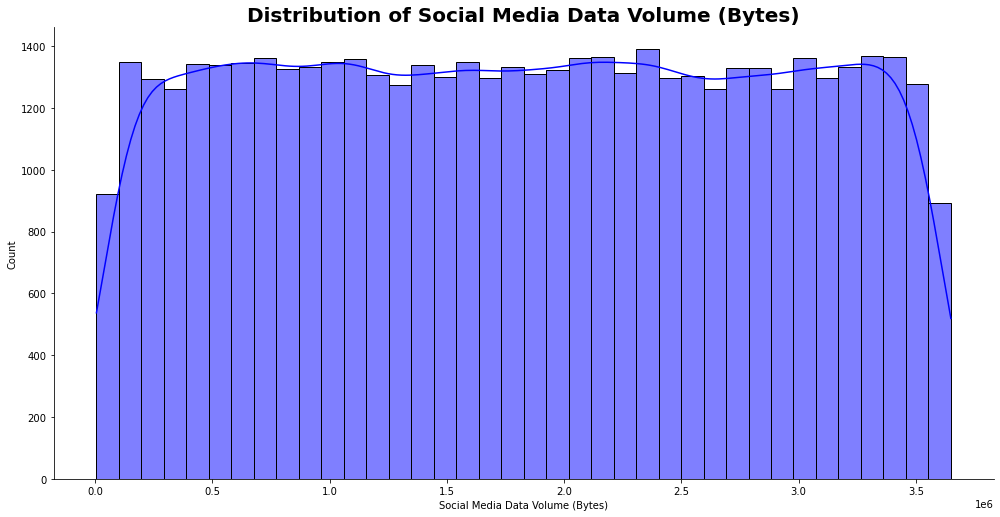

In [33]:
plot.plot_hist(clean_df, 'Social Media Data Volume (Bytes)', 'blue')

In [34]:
clean_df[['Google Data Volume (Bytes)']].describe()

,Google Data Volume (Bytes)
count,4.950900e+04
mean,7.811165e+06
std,3.507208e+06
min,4.033000e+04
25%,4.945766e+06
50%,7.835210e+06
75%,1.066245e+07
max,1.551732e+07


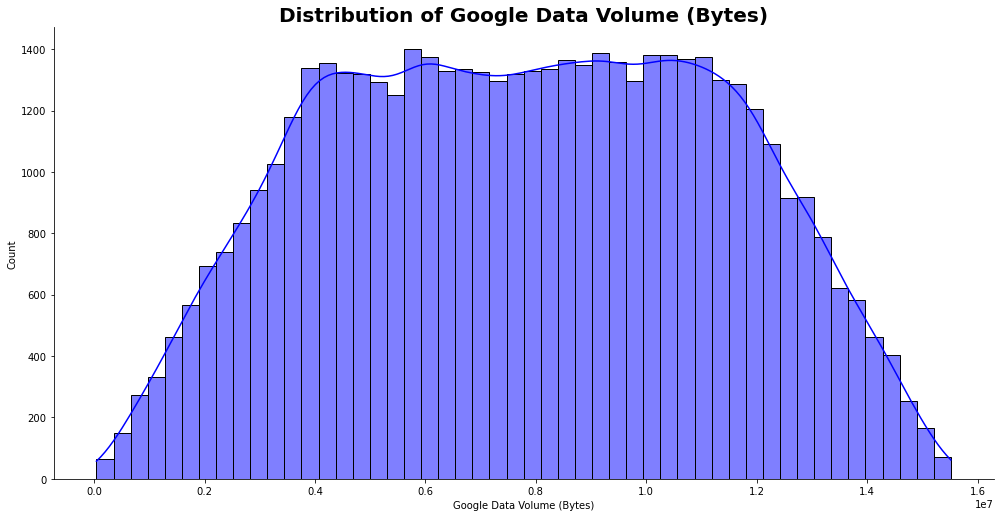

In [35]:
plot.plot_hist(clean_df, 'Google Data Volume (Bytes)', 'blue')

In [36]:
clean_df[['Email Data Volume (Bytes)']].describe()

,Email Data Volume (Bytes)
count,4.950900e+04
mean,2.257424e+06
std,1.071495e+06
min,1.817600e+04
25%,1.357979e+06
50%,2.258073e+06
75%,3.162212e+06
max,4.513579e+06


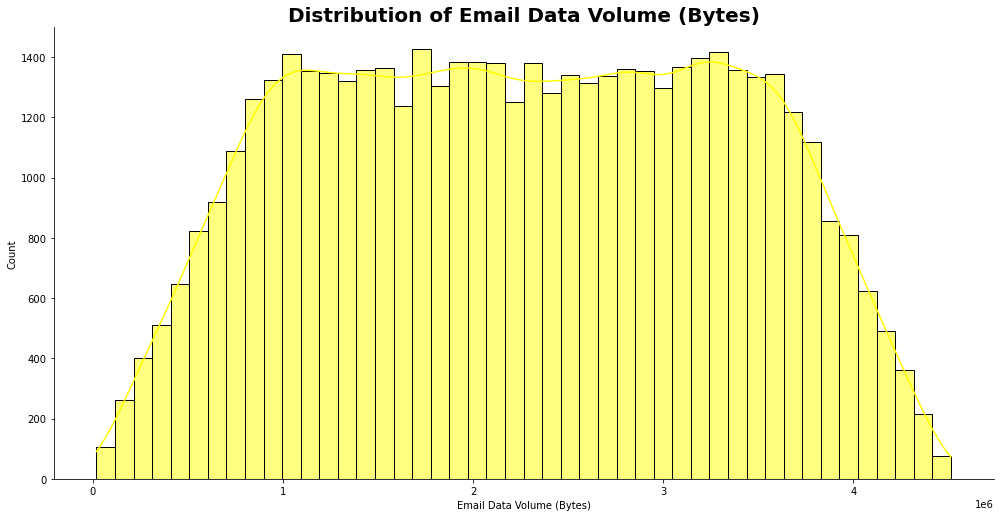

In [37]:
plot.plot_hist(clean_df, 'Email Data Volume (Bytes)', 'yellow')

In [38]:
clean_df[['Youtube Data Volume (Bytes)']].describe()

,Youtube Data Volume (Bytes)
count,4.950900e+04
mean,2.268413e+07
std,9.261070e+06
min,2.265620e+05
25%,1.606554e+07
50%,2.271185e+07
75%,2.935468e+07
max,4.507447e+07


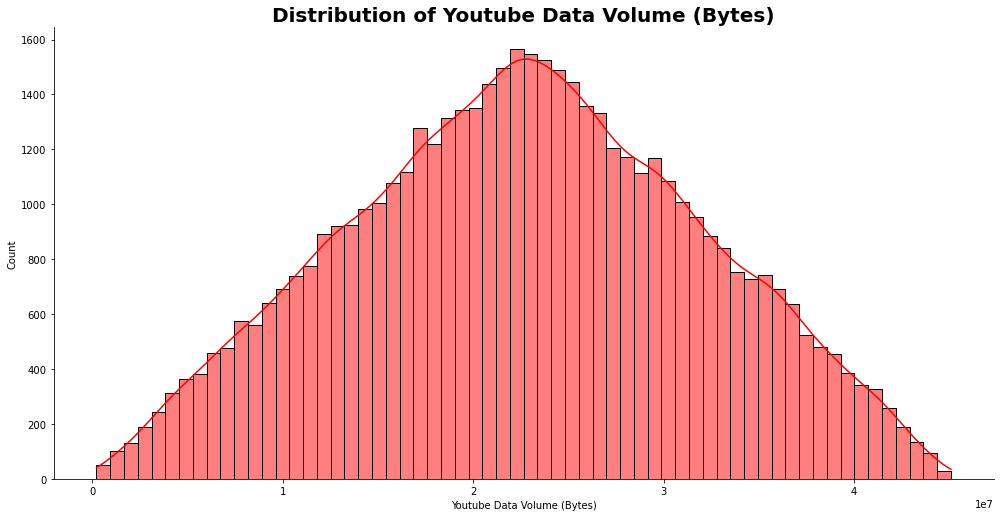

In [39]:
plot.plot_hist(clean_df, 'Youtube Data Volume (Bytes)', 'red')

In [40]:
clean_df[['Netflix Data Volume (Bytes)']].describe()

,Netflix Data Volume (Bytes)
count,4.950900e+04
mean,2.267274e+07
std,9.243576e+06
min,9.843200e+04
25%,1.602532e+07
50%,2.271134e+07
75%,2.929463e+07
max,4.519815e+07


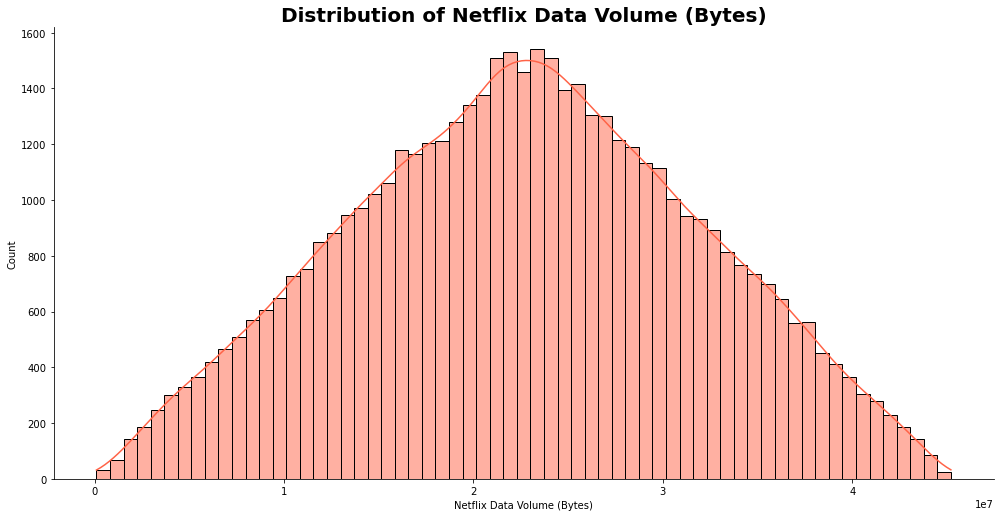

In [41]:
plot.plot_hist(clean_df, 'Netflix Data Volume (Bytes)', 'tomato')

In [42]:
clean_df[['Gaming Data Volume (Bytes)']].describe()

,Gaming Data Volume (Bytes)
count,4.950900e+04
mean,4.300578e+08
std,2.439998e+08
min,8.188670e+05
25%,2.181656e+08
50%,4.306705e+08
75%,6.404279e+08
max,8.590109e+08


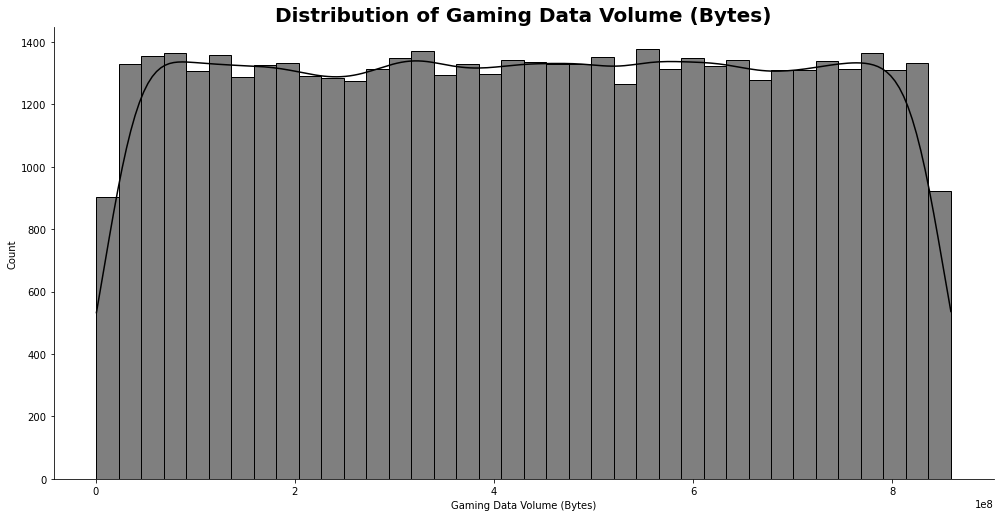

In [43]:
plot.plot_hist(clean_df, 'Gaming Data Volume (Bytes)', 'black')

In [44]:
clean_df[['Total Data Volume (Bytes)']].describe()

,Total Data Volume (Bytes)
count,4.950900e+04
mean,4.955633e+08
std,2.443344e+08
min,3.109335e+07
25%,2.837595e+08
50%,4.958331e+08
75%,7.058194e+08
max,9.526413e+08


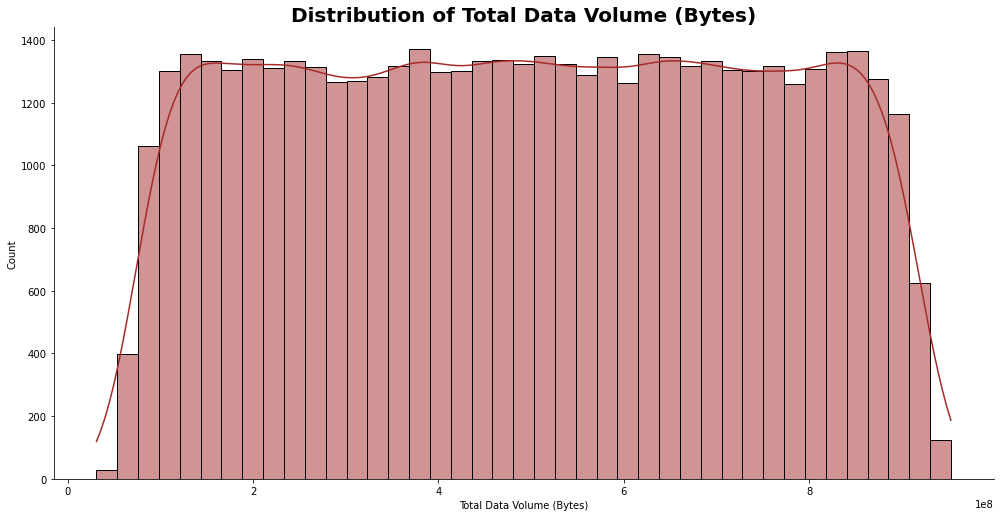

In [45]:
plot.plot_hist(clean_df, 'Total Data Volume (Bytes)', 'brown')

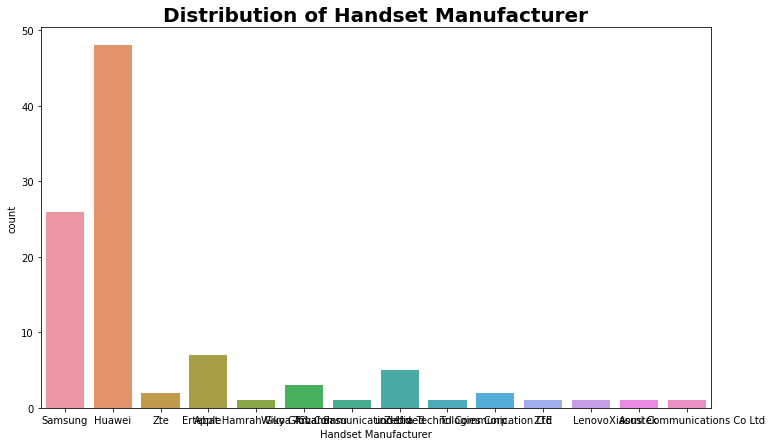

In [46]:
plot.plot_count(clean_df.head(100), 'Handset Manufacturer')

# Bivariate Analysis

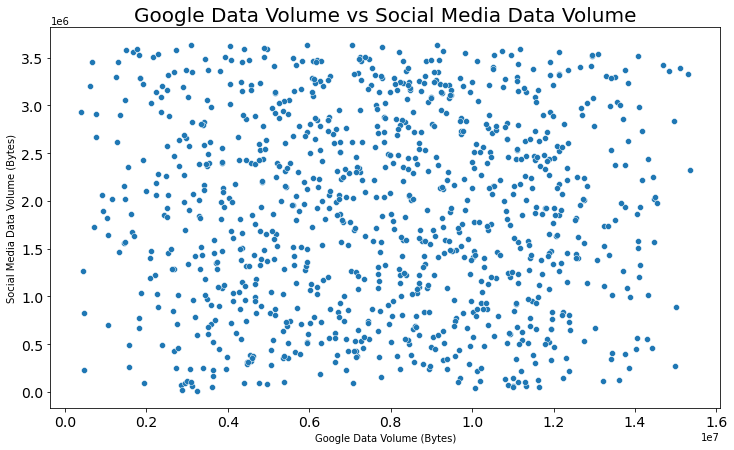

In [47]:
plot.plot_scatter(clean_df.head(1000), x_col="Google Data Volume (Bytes)", y_col="Social Media Data Volume (Bytes)", title="Google Data Volume vs Social Media Data Volume")


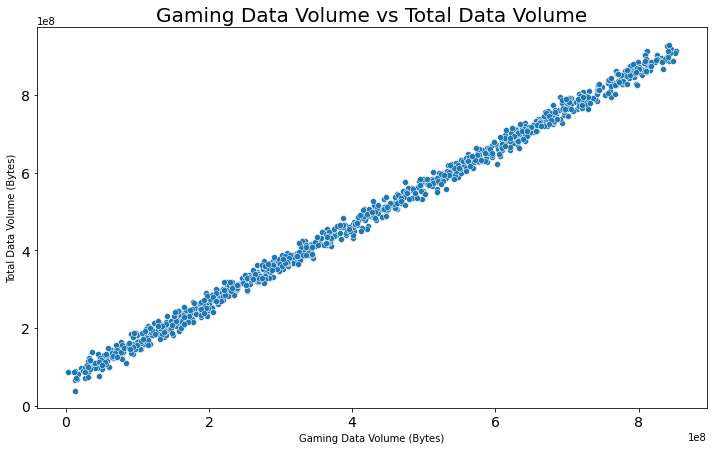

In [48]:
plot.plot_scatter(clean_df.head(1000), x_col='Gaming Data Volume (Bytes)', y_col='Total Data Volume (Bytes)', title="Gaming Data Volume vs Total Data Volume")


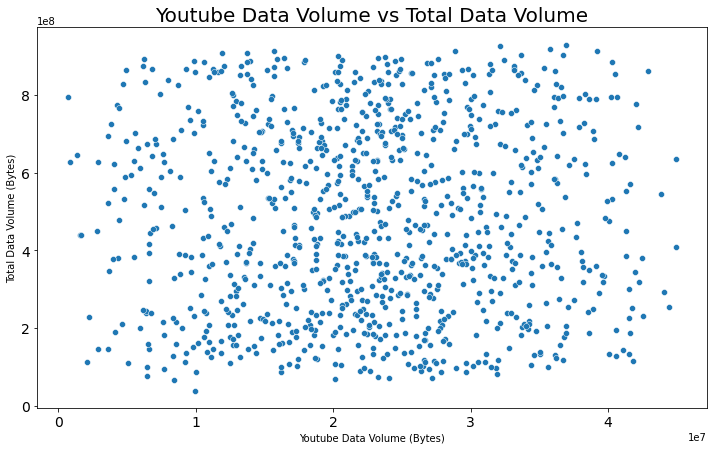

In [49]:
plot.plot_scatter(clean_df.head(1000), x_col='Youtube Data Volume (Bytes)', y_col='Total Data Volume (Bytes)' ,title="Youtube Data Volume vs Total Data Volume")


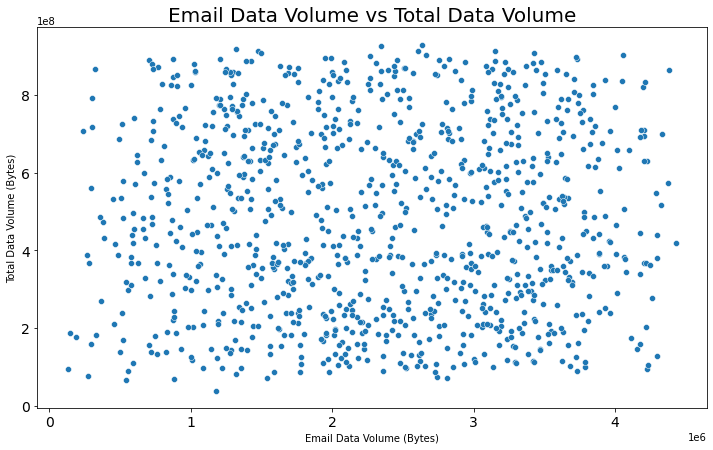

In [50]:
plot.plot_scatter(clean_df.head(1000), x_col='Email Data Volume (Bytes)', y_col='Total Data Volume (Bytes)' ,title="Email Data Volume vs Total Data Volume")


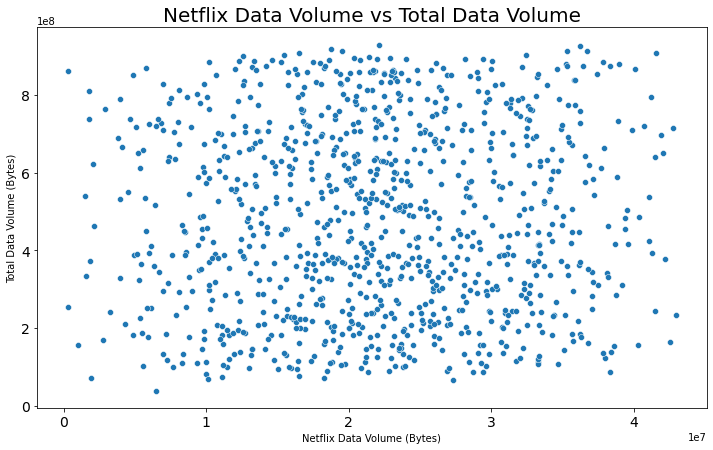

In [51]:
plot.plot_scatter(clean_df.head(1000), x_col='Netflix Data Volume (Bytes)', y_col='Total Data Volume (Bytes)' ,title="Netflix Data Volume vs Total Data Volume")


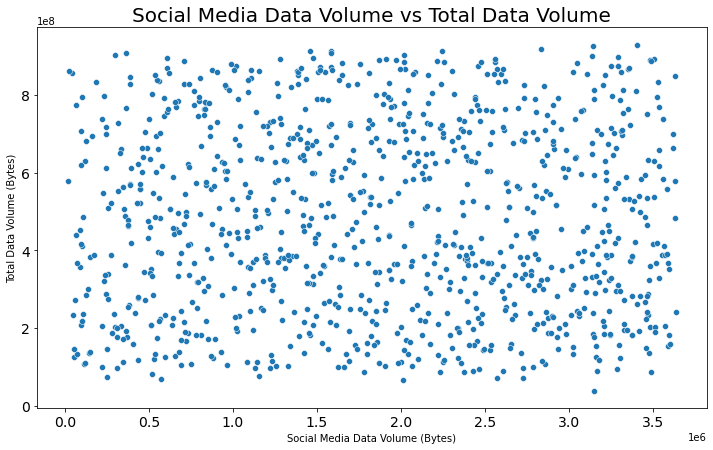

In [52]:
plot.plot_scatter(clean_df.head(1000), x_col='Social Media Data Volume (Bytes)', y_col='Total Data Volume (Bytes)' ,title="Social Media Data Volume vs Total Data Volume")


In [53]:
# fix all outliners
clean_df = cleaner.fix_outliers(clean_df)

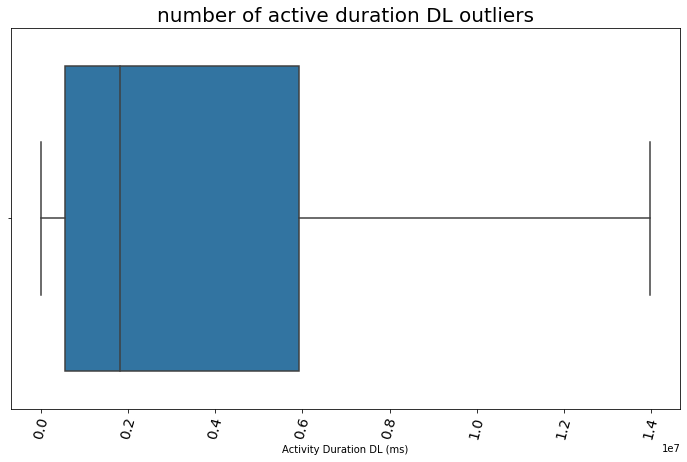

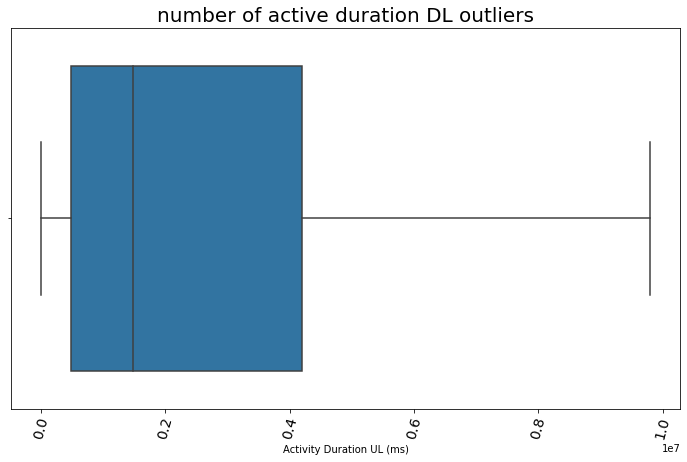

In [54]:
plot.plot_box(clean_df, 'Activity Duration DL (ms)', "number of active duration DL outliers")
plot.plot_box(clean_df, 'Activity Duration UL (ms)', "number of active duration DL outliers")

# Correlation Analysis

In [55]:
corelated_df = clean_df[['Social Media Data Volume (Bytes)', 'Google Data Volume (Bytes)', 'Email Data Volume (Bytes)','Youtube Data Volume (Bytes)', 'Netflix Data Volume (Bytes)', 'Gaming Data Volume (Bytes)','Other Data Volume (Bytes)']].corr()
corelated_df

,Social Media Data Volume (Bytes),Google Data Volume (Bytes),Email Data Volume (Bytes),Youtube Data Volume (Bytes),Netflix Data Volume (Bytes),Gaming Data Volume (Bytes),Other Data Volume (Bytes)
Social Media Data Volume (Bytes),1.000000,0.004977,0.003932,0.002988,0.003663,0.001578,0.009183
Google Data Volume (Bytes),0.004977,1.000000,0.004064,-0.000096,-0.002755,0.000426,-0.000701
Email Data Volume (Bytes),0.003932,0.004064,1.000000,-0.005424,0.004896,-0.003520,-0.002561
Youtube Data Volume (Bytes),0.002988,-0.000096,-0.005424,1.000000,0.003004,-0.001203,0.004918
Netflix Data Volume (Bytes),0.003663,-0.002755,0.004896,0.003004,1.000000,-0.007553,-0.005623
Gaming Data Volume (Bytes),0.001578,0.000426,-0.003520,-0.001203,-0.007553,1.000000,-0.004978
Other Data Volume (Bytes),0.009183,-0.000701,-0.002561,0.004918,-0.005623,-0.004978,1.000000


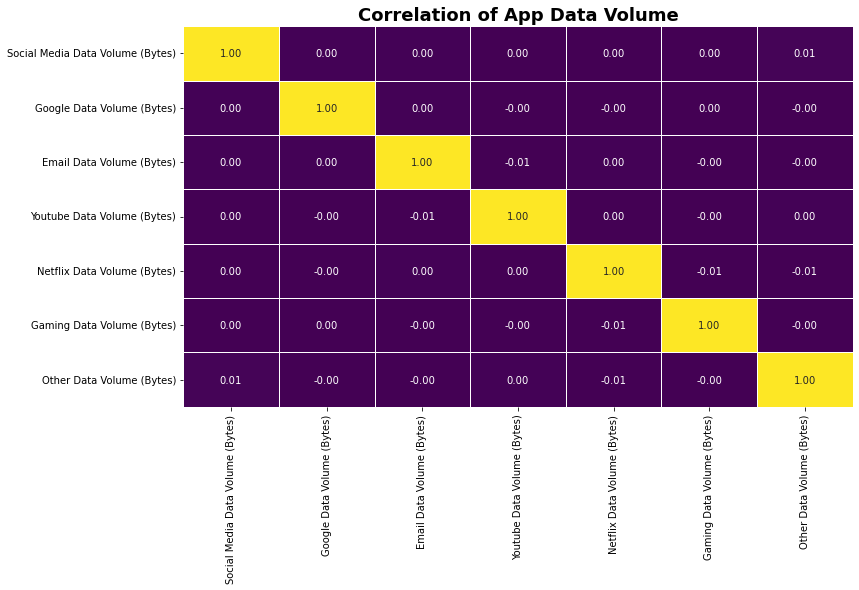

In [56]:
plot.plot_heatmap(corelated_df, "Correlation of App Data Volume")


# Save cleaned data

In [57]:

clean_df.to_csv('../data/clean_data.csv')

In [58]:
# Drop Dur (s) column because we already have Dur (ms) column and we can get the previous from the latter by just dividing with 1000
clean_df = cleaner.drop_column(clean_df, 'Dur (s)')

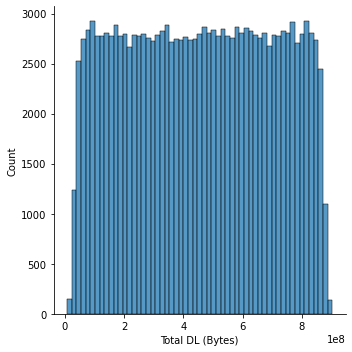

In [59]:
import seaborn as sns
sns.displot(data=df, x=df['Total DL (Bytes)'])

## Transforming Data
Feature scaling

**Standardization and Normalization**

In [ ]:
from sklearn.preprocessing import MinMaxScaler
def normalizer(original_data):
  minmax_scaler = MinMaxScaler()
  tr = minmax_scaler.fit_transform(original_data)
  print("Min Value: ",tr.min())
  print("Max value: ",tr.max())
  # plot both together to compare
  fig, ax=plt.subplots(1,2, figsize=(10, 6))
  sns.histplot(original_data, ax=ax[0])
  ax[0].set_title("Original Data")
  sns.histplot(tr[0], ax=ax[1])
  ax[1].set_title("Normalized data")
normalizer(df)
